<a href="https://colab.research.google.com/github/PatlollaHimaBindu/INSE-6220/blob/main/Raisin_Dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from pycaret.utils import version
version()

'2.3.6'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


In [17]:
df = pd.read_csv('/content/Raisin_Dataset (1).csv')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter    Class  
0   0.758651   1184.040  Kecimen  
1   0.684130   1121.786  Kecimen  
2   0.637613   1208.575  Kecimen  
3   0.699599    844.162  Kecimen  
4   0.792772   1073.251  Kecimen  
5   0.658456    881.836  Kecimen  
6   0.665894    823.796  Kecimen  
7   0.743598    933.366  Kecimen  
8   0.698031    849.728  Kecimen  
9   0.664376    981.544  Kecimen  
10  0.674236   1176.305  Kecimen  
11  0.697068    818.873  Kecimen  
12  0.690856    803.748  Kecimen  
13  0.772322   1042.770  Kecimen  
14  0.680182   1084.729  Kecimen  
15  0.681551    751.413  Kecimen  
16  0.756773   1028.445  Kecimen  
17  0.694998    981.509  Kecimen  
18  0.713838    814.680  Kecimen  
19  0.728075   1061.321  Kecimen  
20  0.734399   1035.501  Kecimen  
21  0.723609    928.272  Kecimen  
22  0.686375   1106.355  Kecimen  
23  0.643596    971.769  Kecimen  
24  0.704057   1181.921  Kecimen

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [19]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [20]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


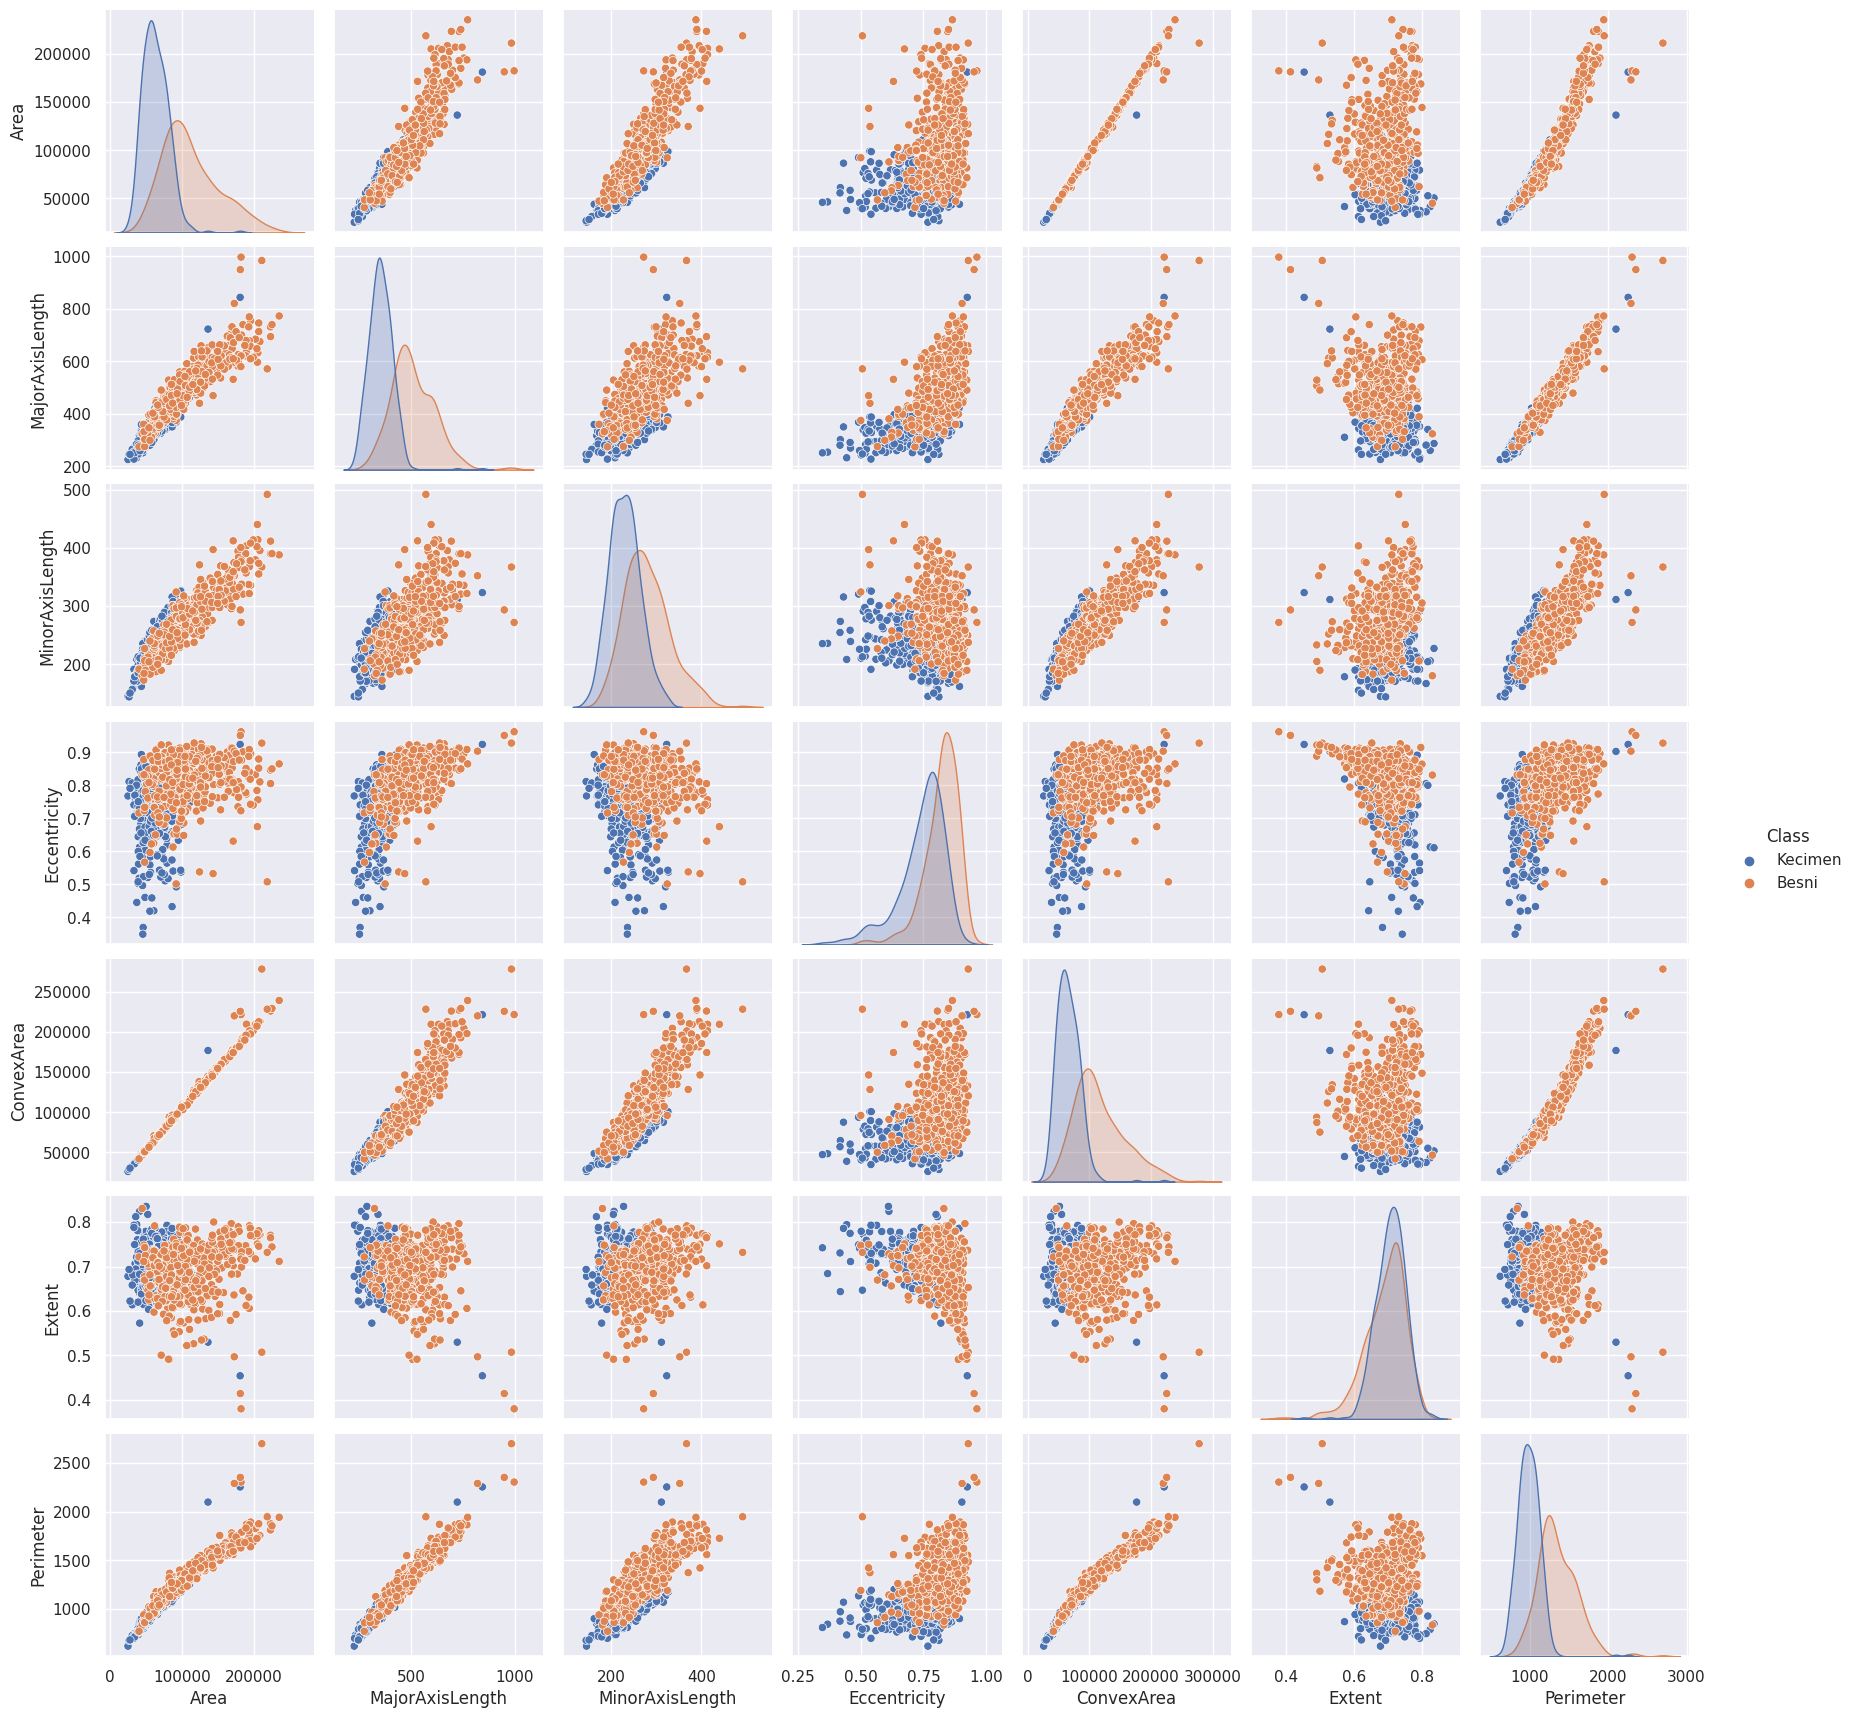

In [21]:
sns.pairplot(df, hue='Class')
plt.show()

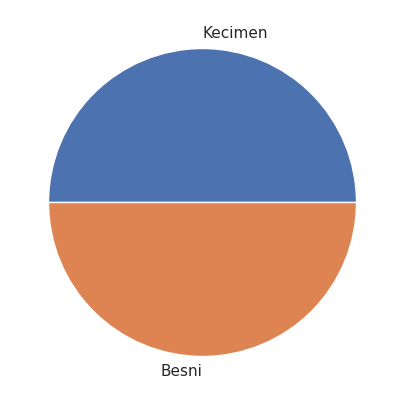

In [22]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [23]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [24]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

In [25]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5 -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6 -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7 -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8 -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9 -0.600920        -0.551563        -0.534746      0.027845   -0.615047   

     Extent  Perimeter  
0  1.106743   0.066274  
1 -0.287777  -0.161252  
2 -1.158250   0.155945  
3  0.001711  -1.175915  
4  1.745259  -0.338639  
5 -0.768202  -1.038224  
6 -0.629029  -1.250349  
7  0.825066  -0.849891  
8 -0.027639  -1.155572  
9 -0.657433  -0.673810

In [26]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

In [27]:
observations = list(df.index)
variables = list(df.columns)

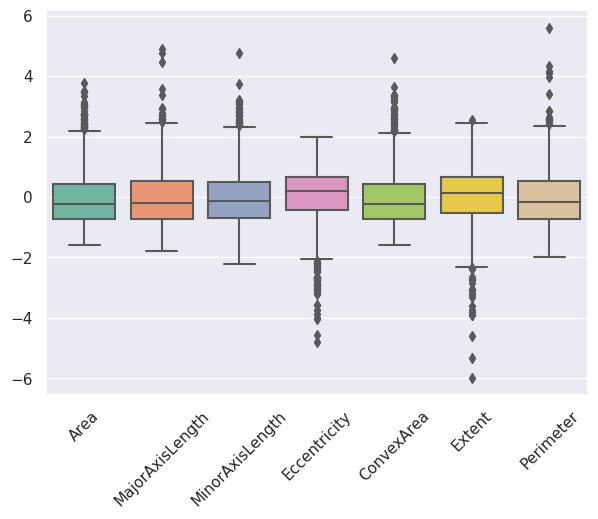

In [28]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.


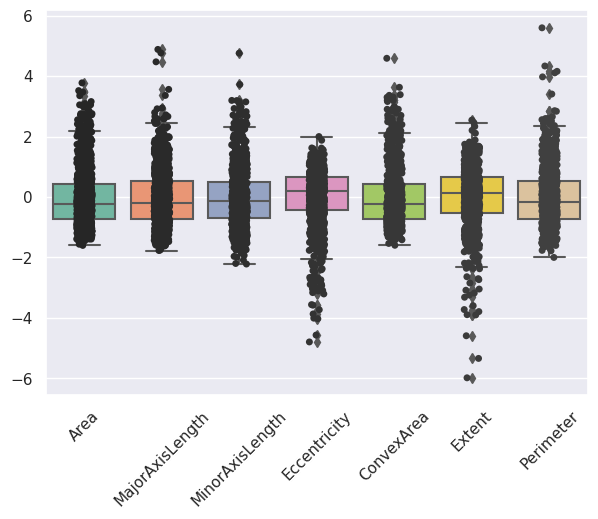

In [29]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

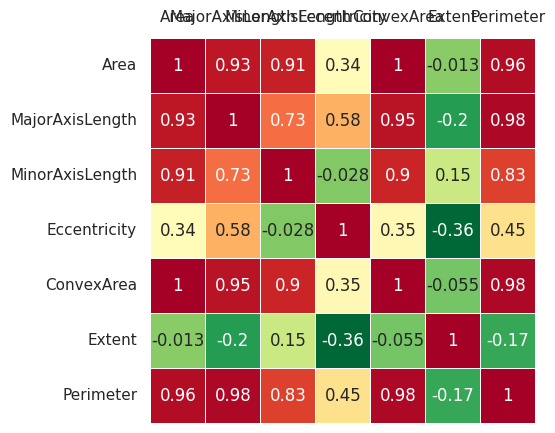

In [30]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '$Z_2$')

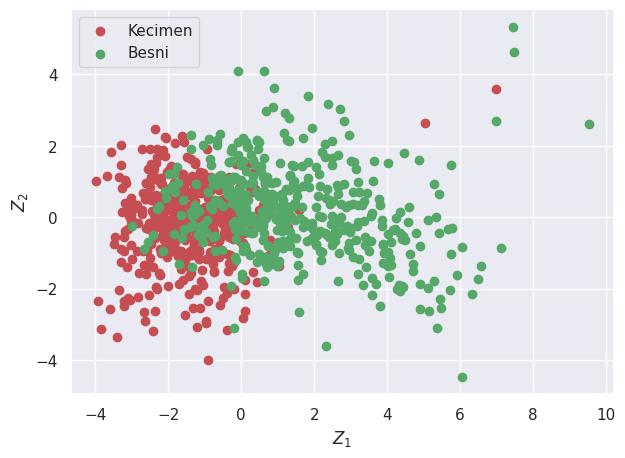

In [31]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Kecimen = np.where(y == 'Kecimen')
idx_Besni = np.where(y == 'Besni')

plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

Eigen Vector
[[ 0.44828422 -0.11609991  0.00548378 -0.11113906 -0.61104765 -0.09983439
  -0.62436686]
 [ 0.4432398   0.13658724 -0.10054797  0.49520464  0.08757032 -0.68557712
   0.22772863]
 [ 0.38938118 -0.37492246  0.23604354 -0.6558767   0.38457775 -0.2390332
   0.12995283]
 [ 0.20297098  0.61082321 -0.62852206 -0.42629865  0.07510412  0.05356014
   0.02044403]
 [ 0.45093833 -0.08761633  0.0366724   0.0558117  -0.39241075  0.47120104
   0.63914127]
 [-0.05636836 -0.66734439 -0.73198093  0.10905256  0.05685884  0.02345199
  -0.00161639]
 [ 0.45082374  0.03417227  0.04430077  0.3398651   0.5551508   0.48726906
  -0.36399975]]


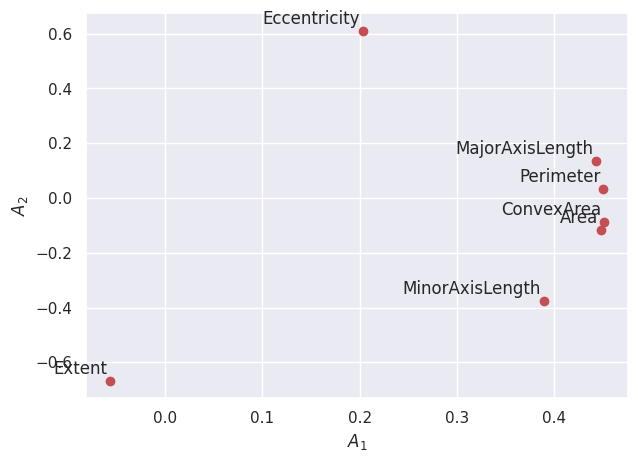

In [32]:
A = pca.components_.T 
print("Eigen Vector")
print(A)

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


invalid value encountered in sqrt


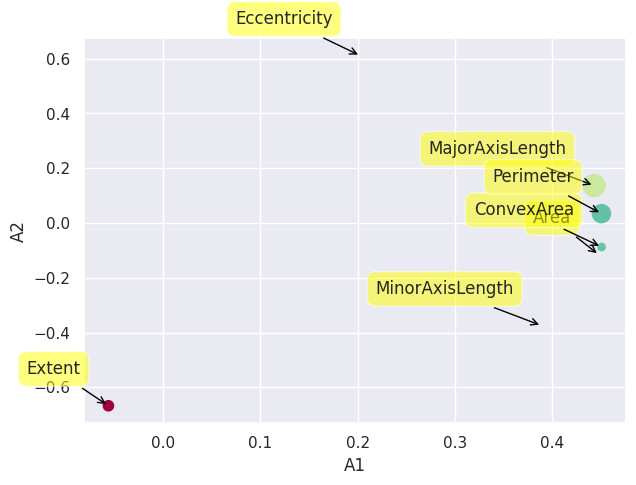

In [33]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->',color='black', connectionstyle='arc3,rad=0'))

[4.83766379e+00 1.45480489e+00 6.29148522e-01 5.68877209e-02
 2.18325269e-02 6.43734371e-03 1.01163378e-03]


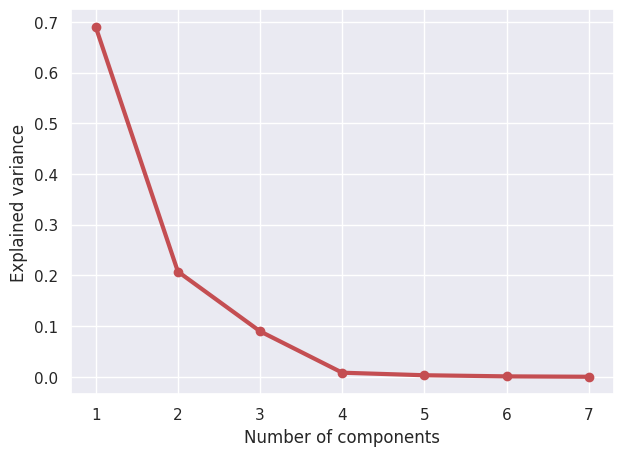

In [34]:
Lambda = pca.explained_variance_
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
print(Lambda)

Text(0, 0.5, 'Cumulative explained variance')

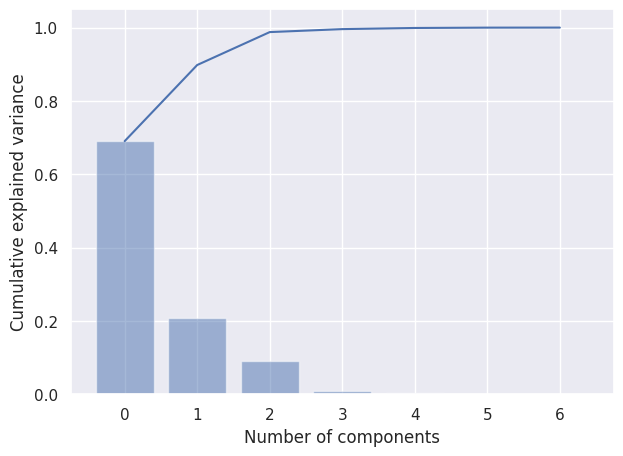

In [35]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-4.53328089e-01,  4.45368368e-01,  8.02008139e-01, -3.02563631e-01,
       -2.96776301e+00,  9.24411879e-01,  1.34063710e+00, -9.21366416e-01,
        1.13506065e+00,  6.81523300e-01,  1.04556343e+00,  5.90230725e-01,
       -1.53326945e-01, -3.08398943e+00,  2.17438854e-01,  8.09003134e-01,
        2.40283347e-01, -3.24187105e-02,  5.19283272e-01,  4.94038098e-01,
       -9.76196977e-01, -3.33467933e-01, -2.55683878e-01, -1.93447544e+00,
       -1.86304331e-01, -9.84134587e-01, -2.53403074e+00, -1.80985327e-01,
       -2.90990507e+00, -2.72923663e-01, -7.13686609e-01,  9.47521743e-01,
       -1.06642690e+00, -4.74512728e-01, -2.49299302e+00, -2.03607804e+00,
       -8.68979157e-01,  2.11537306e+00, -9.81907359e-02, -1.60187820e+00,
       -2.13918053e+00, -6.38506342e-01, -9.46798550e-01, -3.17041937e+00,
        1.58097964e+00,  3.89889395e-01, -2.88802500e-01, -2.34187568e+00,
        5.55485028e-01,  1.40089791e-01,  1.36318999e+00,  2.13310172e-01,
        1.91845642e+00,  

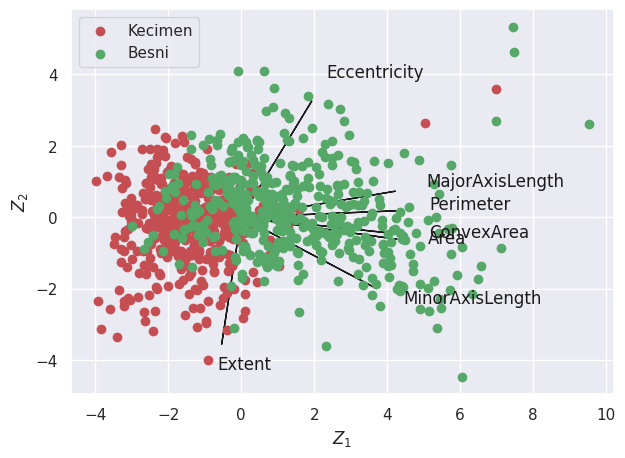

In [36]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')
plt.legend(loc='upper left')
Z1
Z2

In [37]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [39]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

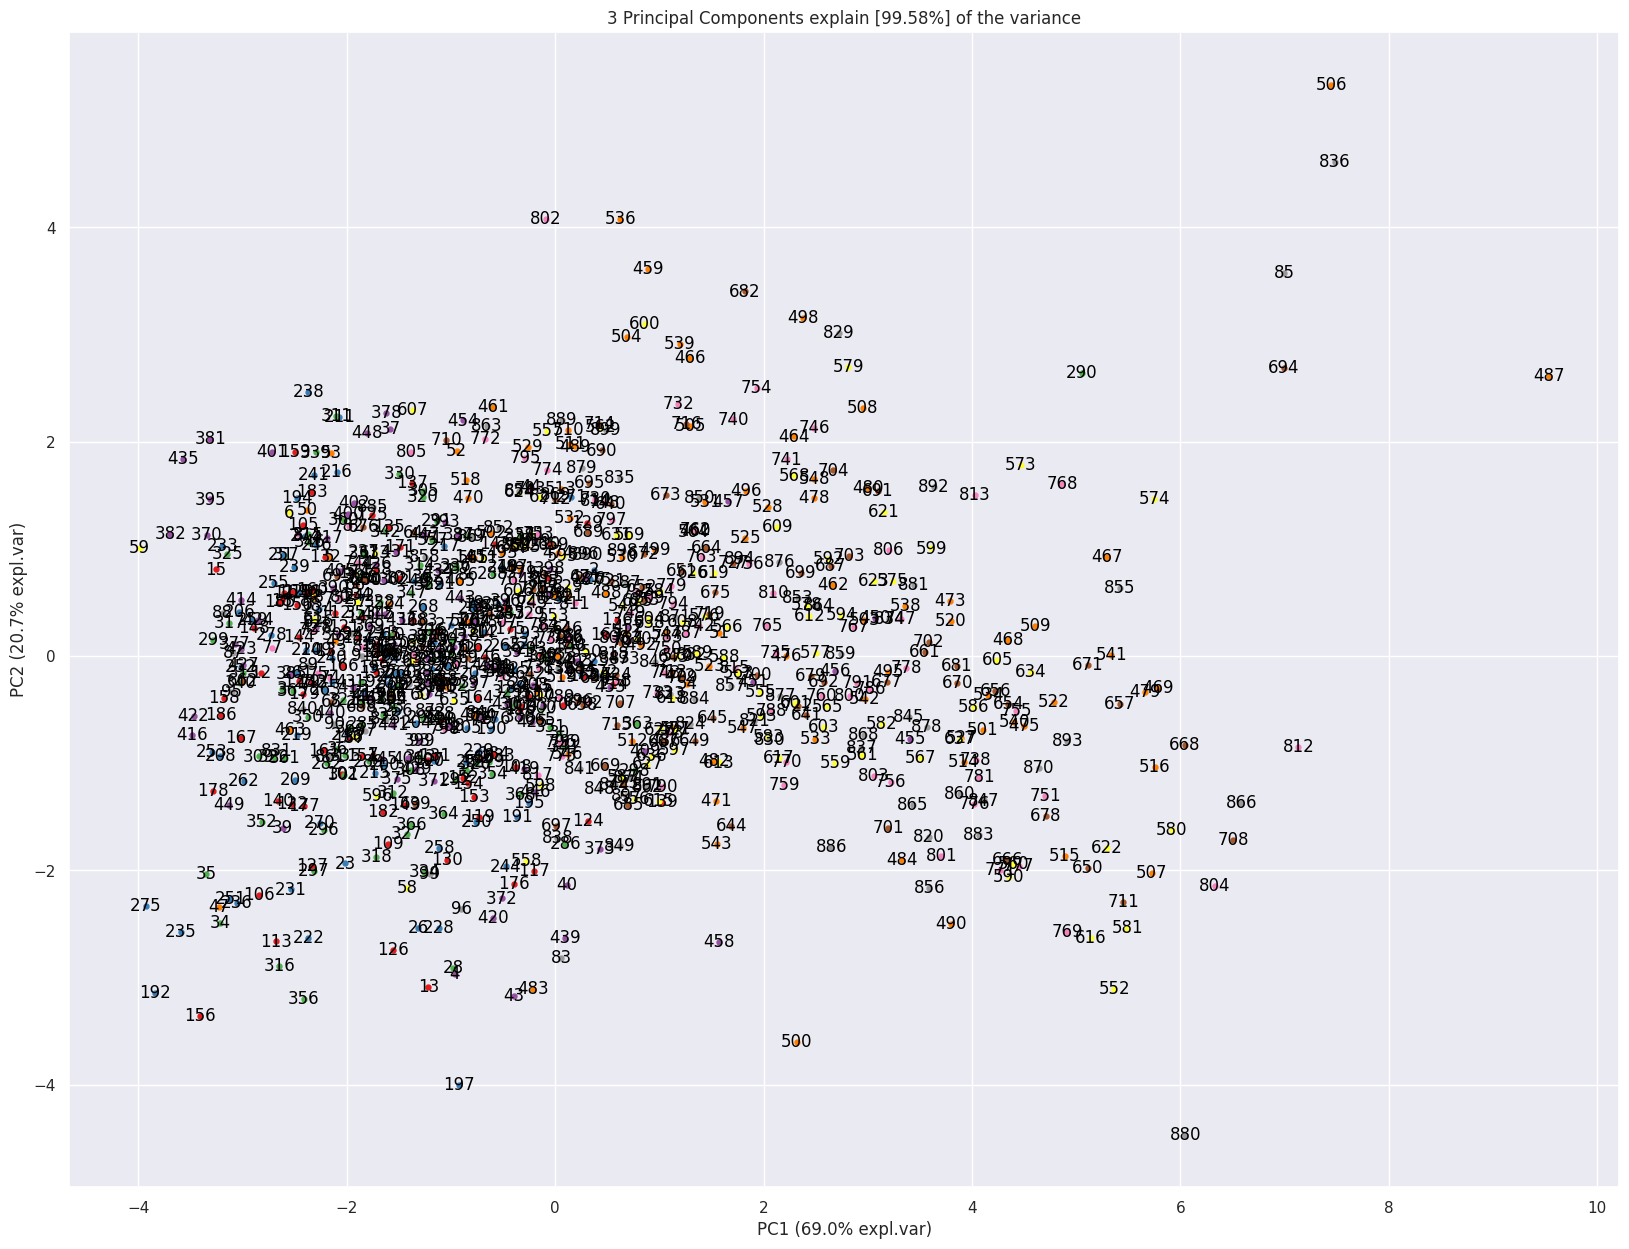

In [40]:
model.scatter(label=True, legend=False)

In [41]:
A = out['loadings'].T

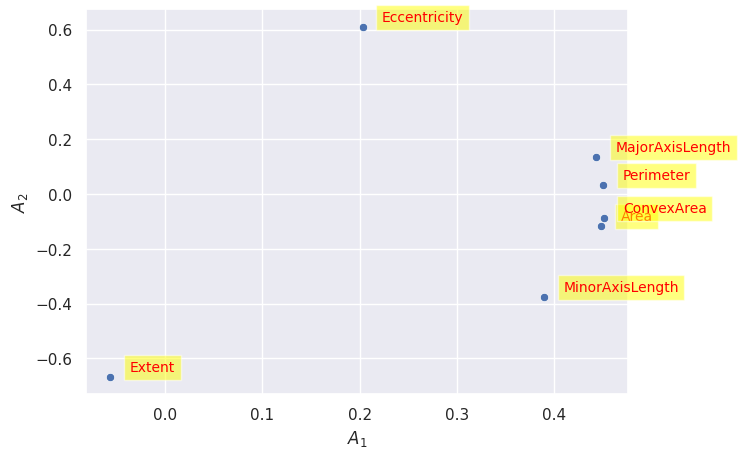

In [42]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

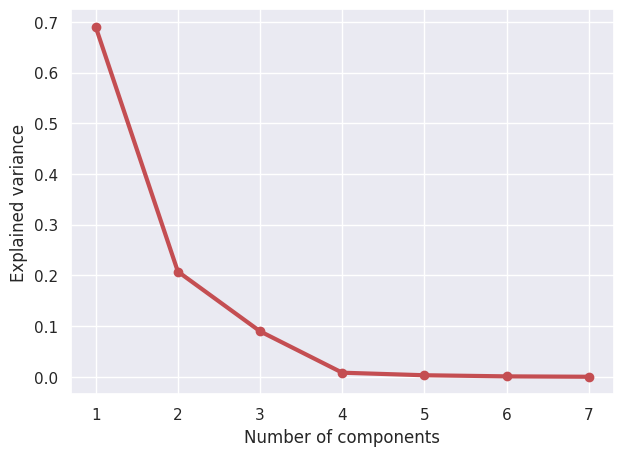

In [43]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

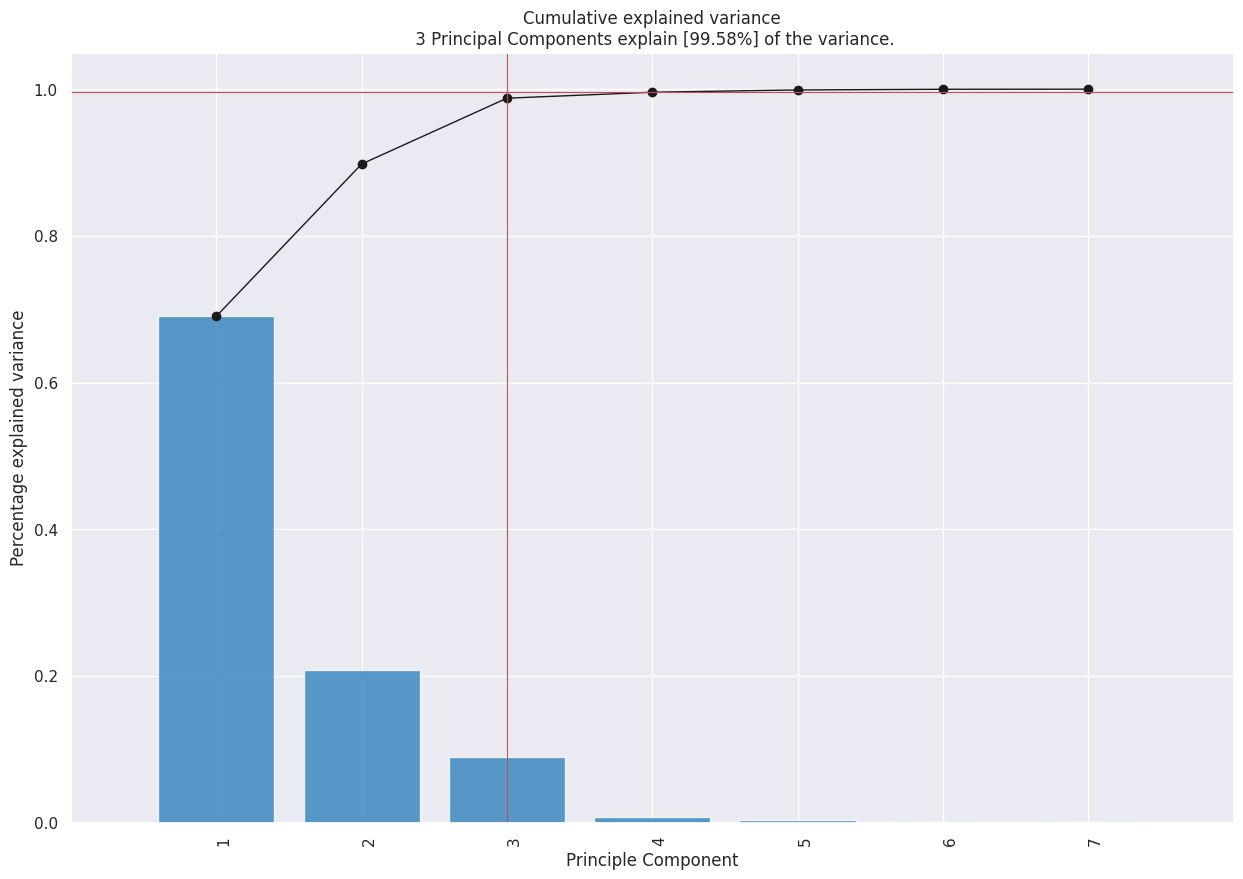

<Figure size 700x500 with 0 Axes>

In [44]:
model.plot();

Biplot

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

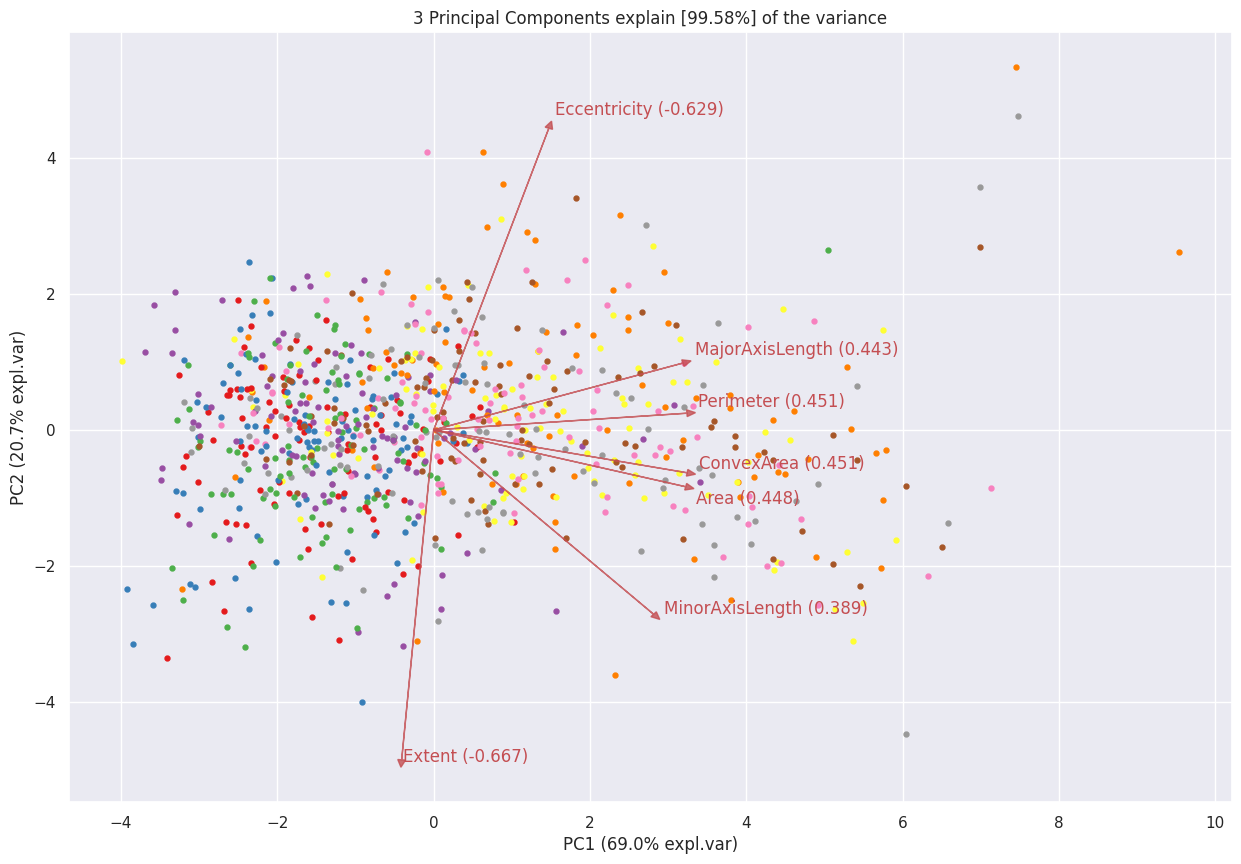

In [45]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [900] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)', zlabel='PC3 (8.97% expl.var)'>)

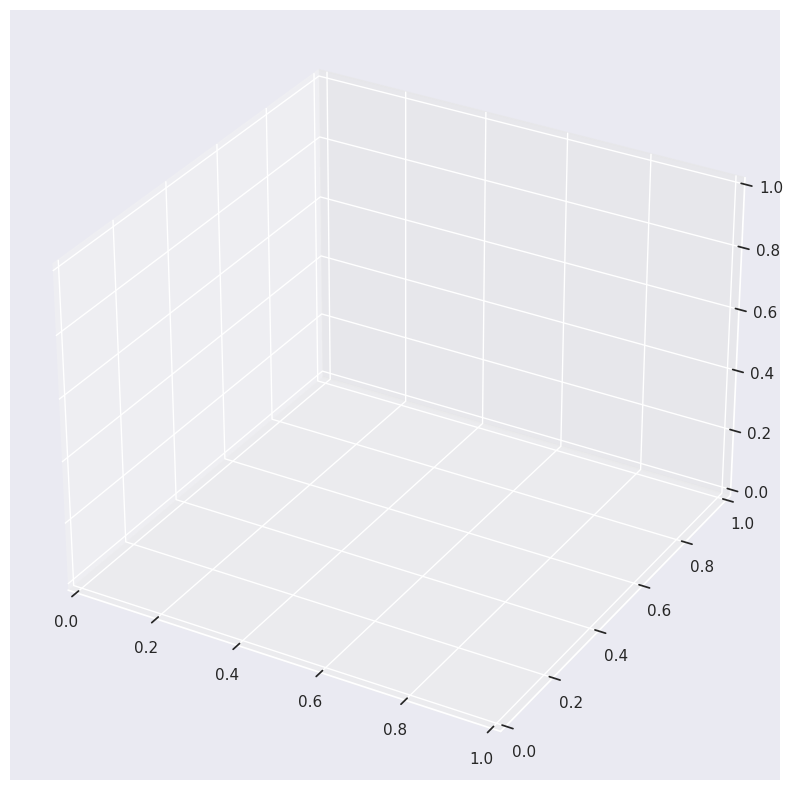

In [46]:
model.biplot3d(legend=False)

In [47]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [48]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [49]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description                 Value
0                               session_id                   123
1                                   Target                 Class
2                              Target Type                Binary
3                            Label Encoded  Besni: 0, Kecimen: 1
4                            Original Data              (810, 8)
5                           Missing Values                 False
6                         Numeric Features                     7
7                     Categorical Features                     0
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set              (566, 6)
12                    Transformed Test Set              (244, 6)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                 False
19                          Log Experiment                 False
20                         Experiment Name      clf-default-name
21                                     USI                  58e0
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                 False
30                        Normalize Method                  None
31                          Transformation                 False
32                   Transformation Method                  None
33                                     PCA                 False
34                              PCA Method                  None
35                          PCA Components                  None
36                     Ignore Low Variance                 False
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                 False
43             Multicollinearity Threshold                  None
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing Models**

In [50]:
#show the best model and their statistics
best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8852  0.9384  0.9071  0.8701   
et                 Extra Trees Classifier    0.8728  0.9296  0.9071  0.8490   
rf               Random Forest Classifier    0.8693  0.9251  0.9143  0.8393   
xgboost         Extreme Gradient Boosting    0.8639  0.9253  0.8895  0.8464   
gbc          Gradient Boosting Classifier    0.8623  0.9229  0.9000  0.8387   
lda          Linear Discriminant Analysis    0.8623  0.9286  0.8643  0.8610   
ridge                    Ridge Classifier    0.8605  0.0000  0.8750  0.8516   
qda       Quadratic Discriminant Analysis    0.8603  0.9239  0.9179  0.8239   
lightgbm  Light Gradient Boosting Machine    0.8568  0.9227  0.8858  0.8364   
ada                  Ada Boost Classifier    0.8534  0.9106  0.8786  0.8351   
nb                            Naive Bayes    0.8377  0.9096  0.9143  0.7916   
knn                K Neighbors Classifier    0.8146  0.8654  0.8429  0.7974   
dt               Decision Tree Classifier    0.8075  0.8074  0.7936  0.8162   
svm                   SVM - Linear Kernel    0.5105  0.0000  0.1107  0.1509   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8870  0.7704  0.7736     0.362  
et        0.8761  0.7457  0.7498     0.178  
rf        0.8742  0.7387  0.7439     0.412  
xgboost   0.8665  0.7280  0.7306     0.091  
gbc       0.8662  0.7247  0.7310     0.121  
lda       0.8611  0.7245  0.7274     0.013  
ridge     0.8611  0.7210  0.7251     0.018  
qda       0.8675  0.7209  0.7273     0.014  
lightgbm  0.8598  0.7136  0.7160     0.189  
ada       0.8555  0.7069  0.7097     0.099  
nb        0.8480  0.6757  0.6854     0.013  
knn       0.8178  0.6294  0.6334     0.021  
dt        0.8037  0.6148  0.6166     0.019  
svm       0.0868  0.0109  0.0240     0.023  
dummy     0.0000  0.0000  0.0000     0.018

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [51]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8596  0.7857  0.7586  0.7719  0.5440  0.5443
1       0.8947  0.9126  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8947  0.9778  0.8929  0.8929  0.8929  0.7894  0.7894
3       0.8596  0.8904  0.9286  0.8125  0.8667  0.7199  0.7271
4       0.8947  0.9335  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.8947  0.9286  0.9655  0.8485  0.9032  0.7889  0.7968
6       0.8393  0.9490  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8393  0.9069  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9107  0.9809  0.8929  0.9259  0.9091  0.8214  0.8220
9       0.7679  0.8878  0.7857  0.7586  0.7719  0.5357  0.5361
Mean    0.8568  0.9227  0.8858  0.8364  0.8598  0.7136  0.7160
SD      0.0494  0.0372  0.0573  0.0518  0.0491  0.0988  0.0995

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [53]:
#trained model object is stored in the variable 'light'. 
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Tune Gradient Boosting Model**

In [54]:
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8701  0.8214  0.7667  0.7931  0.5793  0.5808
1       0.8772  0.9076  0.9286  0.8387  0.8814  0.7548  0.7590
2       0.8947  0.9544  0.8929  0.8929  0.8929  0.7894  0.7894
3       0.8246  0.9033  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8596  0.8947  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9123  0.9575  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8750  0.9337  0.9286  0.8387  0.8814  0.7500  0.7543
7       0.8929  0.9145  0.9643  0.8438  0.9000  0.7857  0.7939
8       0.9464  0.9783  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.8571  0.8878  0.8571  0.8571  0.8571  0.7143  0.7143
Mean    0.8729  0.9202  0.9179  0.8420  0.8775  0.7460  0.7509
SD      0.0419  0.0329  0.0506  0.0476  0.0410  0.0836  0.0835

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
#tuned model object is stored in the variable 'tuned_lightbm'. 
tuned_lightgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate Light Gradient Boosting Model**

In [56]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Analyze model performance using various Plots**

In [57]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create KNN**

In [59]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8362  0.8214  0.7667  0.7931  0.5793  0.5808
1       0.8070  0.8411  0.8571  0.7742  0.8136  0.6146  0.6181
2       0.8421  0.9033  0.8571  0.8276  0.8421  0.6843  0.6847
3       0.7368  0.8282  0.7857  0.7097  0.7458  0.4745  0.4771
4       0.7193  0.7599  0.7500  0.7000  0.7241  0.4391  0.4402
5       0.9123  0.9452  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.7321  0.8125  0.7500  0.7241  0.7368  0.4643  0.4646
7       0.8750  0.9018  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8393  0.9043  0.7500  0.9130  0.8235  0.6786  0.6897
9       0.8929  0.9216  0.9286  0.8667  0.8966  0.7857  0.7877
Mean    0.8146  0.8654  0.8429  0.7974  0.8178  0.6294  0.6334
SD      0.0658  0.0553  0.0833  0.0692  0.0653  0.1313  0.1338

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune KNN Classifier**

In [60]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8461  0.8571  0.8000  0.8276  0.6494  0.6510
1       0.7895  0.8399  0.8214  0.7667  0.7931  0.5793  0.5808
2       0.8421  0.9224  0.9286  0.7879  0.8525  0.6851  0.6958
3       0.7895  0.8264  0.8571  0.7500  0.8000  0.5799  0.5856
4       0.7368  0.7672  0.7857  0.7097  0.7458  0.4745  0.4771
5       0.8596  0.9384  0.9655  0.8000  0.8750  0.7182  0.7348
6       0.7857  0.8571  0.8214  0.7667  0.7931  0.5714  0.5729
7       0.8393  0.9145  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.8393  0.9260  0.8214  0.8519  0.8364  0.6786  0.6790
9       0.8036  0.8814  0.8929  0.7576  0.8197  0.6071  0.6171
Mean    0.8110  0.8719  0.8644  0.7797  0.8191  0.6222  0.6277
SD      0.0350  0.0517  0.0527  0.0366  0.0354  0.0697  0.0721

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate KNN**

In [61]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Quadratic Discriminant Analysis Model**

In [62]:
qda = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8836  0.8571  0.8276  0.8421  0.6843  0.6847
1       0.9123  0.9433  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8596  0.9397  0.8929  0.8333  0.8621  0.7196  0.7213
3       0.8070  0.9101  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8772  0.9015  0.9643  0.8182  0.8852  0.7551  0.7669
5       0.9298  0.9840  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8036  0.8890  0.8929  0.7576  0.8197  0.6071  0.6171
7       0.8393  0.9184  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9286  0.9643  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.8036  0.9056  0.8571  0.7742  0.8136  0.6071  0.6107
Mean    0.8603  0.9239  0.9179  0.8239  0.8675  0.7209  0.7273
SD      0.0475  0.0312  0.0453  0.0548  0.0436  0.0948  0.0932

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune Quadratic Discriminant Analysis Model**

In [63]:
tuned_qda = tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8836  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.8947  0.9335  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8596  0.9581  0.8571  0.8571  0.8571  0.7192  0.7192
3       0.8070  0.9126  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8947  0.9015  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9123  0.9803  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8214  0.8801  0.8214  0.8214  0.8214  0.6429  0.6429
7       0.8571  0.9145  0.8929  0.8333  0.8621  0.7143  0.7161
8       0.9286  0.9860  0.9286  0.9286  0.9286  0.8571  0.8571
9       0.8393  0.8865  0.8929  0.8065  0.8475  0.6786  0.6825
Mean    0.8657  0.9237  0.9000  0.8428  0.8692  0.7315  0.7357
SD      0.0382  0.0374  0.0525  0.0455  0.0369  0.0761  0.0750

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate**

In [64]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Naive Bayes**

In [65]:
nb = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8522  0.8929  0.7812  0.8333  0.6499  0.6563
1       0.8421  0.9126  0.8929  0.8065  0.8475  0.6847  0.6885
2       0.7895  0.9076  0.8214  0.7667  0.7931  0.5793  0.5808
3       0.7895  0.8805  0.8929  0.7353  0.8065  0.5804  0.5936
4       0.7895  0.8559  0.8929  0.7353  0.8065  0.5804  0.5936
5       0.8596  0.9766  1.0000  0.7838  0.8788  0.7178  0.7482
6       0.8750  0.9196  0.9643  0.8182  0.8852  0.7500  0.7623
7       0.8750  0.9247  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8929  0.9656  0.9643  0.8438  0.9000  0.7857  0.7939
9       0.8393  0.9005  0.8929  0.8065  0.8475  0.6786  0.6825
Mean    0.8377  0.9096  0.9143  0.7916  0.8480  0.6757  0.6854
SD      0.0367  0.0388  0.0484  0.0364  0.0358  0.0729  0.0742

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


**Tune Naive Bayes**

In [66]:
tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8559  0.8929  0.7812  0.8333  0.6499  0.6563
1       0.8421  0.9126  0.8929  0.8065  0.8475  0.6847  0.6885
2       0.8070  0.9076  0.8571  0.7742  0.8136  0.6146  0.6181
3       0.7895  0.8805  0.8929  0.7353  0.8065  0.5804  0.5936
4       0.7895  0.8571  0.8929  0.7353  0.8065  0.5804  0.5936
5       0.8596  0.9766  1.0000  0.7838  0.8788  0.7178  0.7482
6       0.8750  0.9222  0.9643  0.8182  0.8852  0.7500  0.7623
7       0.8750  0.9273  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.8929  0.9643  0.9643  0.8438  0.9000  0.7857  0.7939
9       0.8571  0.8992  0.9286  0.8125  0.8667  0.7143  0.7217
Mean    0.8412  0.9103  0.9214  0.7929  0.8519  0.6828  0.6930
SD      0.0351  0.0381  0.0416  0.0362  0.0335  0.0697  0.0703

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-07)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Naive Bayes**

In [67]:
evaluate_model(tuned_nb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-07), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the Best Model**

In [68]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.8682  0.8214  0.8519  0.8364  0.6839  0.6843
1       0.9123  0.9421  0.9643  0.8710  0.9153  0.8248  0.8294
2       0.8947  0.9618  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9212  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8947  0.9323  0.9286  0.8667  0.8966  0.7897  0.7916
5       0.9474  0.9717  1.0000  0.9062  0.9508  0.8945  0.8995
6       0.8393  0.9298  0.8571  0.8276  0.8421  0.6786  0.6790
7       0.8750  0.9439  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9783  0.9286  0.9630  0.9455  0.8929  0.8934
9       0.8929  0.9349  0.8929  0.8929  0.8929  0.7857  0.7857
Mean    0.8869  0.9384  0.9107  0.8706  0.8888  0.7740  0.7774
SD      0.0404  0.0294  0.0511  0.0524  0.0391  0.0806  0.0794

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [69]:
tuned_best_model

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

In [70]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Classification & PCA**

In [71]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description                 Value
0                               session_id                   123
1                                   Target                 Class
2                              Target Type                Binary
3                            Label Encoded  Besni: 0, Kecimen: 1
4                            Original Data              (810, 8)
5                           Missing Values                 False
6                         Numeric Features                     7
7                     Categorical Features                     0
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set              (566, 3)
12                    Transformed Test Set              (244, 3)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                 False
19                          Log Experiment                 False
20                         Experiment Name      clf-default-name
21                                     USI                  aa96
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                  True
30                        Normalize Method                zscore
31                          Transformation                 False
32                   Transformation Method                  None
33                                     PCA                  True
34                              PCA Method                linear
35                          PCA Components                     3
36                     Ignore Low Variance                 False
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                 False
43             Multicollinearity Threshold                  None
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

**Comparing Models**

In [72]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8604  0.9060  0.9107  0.8263   
lr                    Logistic Regression    0.8570  0.9206  0.8714  0.8472   
ridge                    Ridge Classifier    0.8569  0.0000  0.9179  0.8175   
lda          Linear Discriminant Analysis    0.8569  0.9213  0.9179  0.8175   
lightgbm  Light Gradient Boosting Machine    0.8553  0.9054  0.8828  0.8372   
nb                            Naive Bayes    0.8552  0.9199  0.9179  0.8142   
ada                  Ada Boost Classifier    0.8517  0.9077  0.8895  0.8273   
qda       Quadratic Discriminant Analysis    0.8463  0.9112  0.9071  0.8092   
xgboost         Extreme Gradient Boosting    0.8431  0.8902  0.8755  0.8223   
rf               Random Forest Classifier    0.8429  0.9069  0.8752  0.8218   
gbc          Gradient Boosting Classifier    0.8412  0.9094  0.8680  0.8235   
et                 Extra Trees Classifier    0.8392  0.9171  0.8717  0.8203   
svm                   SVM - Linear Kernel    0.8184  0.0000  0.7980  0.8293   
dt               Decision Tree Classifier    0.8007  0.8004  0.7900  0.8076   
dummy                    Dummy Classifier    0.5035  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8661  0.7211  0.7255     0.041  
lr        0.8572  0.7139  0.7179     0.018  
ridge     0.8641  0.7142  0.7212     0.024  
lda       0.8641  0.7142  0.7212     0.014  
lightgbm  0.8583  0.7107  0.7137     0.073  
nb        0.8626  0.7107  0.7171     0.021  
ada       0.8561  0.7036  0.7076     0.092  
qda       0.8540  0.6930  0.7011     0.014  
xgboost   0.8471  0.6862  0.6892     0.070  
rf        0.8466  0.6859  0.6893     0.331  
gbc       0.8439  0.6824  0.6858     0.096  
et        0.8438  0.6786  0.6825     0.194  
svm       0.8081  0.6367  0.6430     0.022  
dt        0.7951  0.6010  0.6052     0.024  
dummy     0.0000  0.0000  0.0000     0.019

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


**Best Model with PCA**

In [73]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [74]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9002  0.9286  0.7879  0.8525  0.6851  0.6958
1       0.8772  0.8904  0.8929  0.8621  0.8772  0.7545  0.7549
2       0.8772  0.9655  0.8929  0.8621  0.8772  0.7545  0.7549
3       0.8070  0.9317  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8596  0.8849  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9298  0.9446  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8393  0.9082  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8929  0.9267  0.9286  0.8667  0.8966  0.7857  0.7877
8       0.9286  0.9528  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9184  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8711  0.9223  0.9214  0.8373  0.8767  0.7424  0.7475
SD      0.0369  0.0255  0.0350  0.0448  0.0336  0.0733  0.0707

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [75]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate the Best Model**

In [76]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
lightgbm_pca = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8953  0.8571  0.8000  0.8276  0.6494  0.6510
1       0.8596  0.8584  0.8929  0.8333  0.8621  0.7196  0.7213
2       0.8947  0.9397  0.8571  0.9231  0.8889  0.7891  0.7911
3       0.8246  0.9052  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8070  0.8855  0.8214  0.7931  0.8070  0.6142  0.6145
5       0.8246  0.9236  0.8276  0.8276  0.8276  0.6490  0.6490
6       0.8750  0.8992  0.9286  0.8387  0.8814  0.7500  0.7543
7       0.8750  0.9018  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9464  0.9630  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.8214  0.8827  0.8214  0.8214  0.8214  0.6429  0.6429
Mean    0.8553  0.9054  0.8828  0.8372  0.8583  0.7107  0.7137
SD      0.0412  0.0285  0.0499  0.0501  0.0403  0.0822  0.0818

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


**Tune Light GBM Model**

In [78]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8621  0.8929  0.7812  0.8333  0.6499  0.6563
1       0.8421  0.9132  0.8571  0.8276  0.8421  0.6843  0.6847
2       0.8772  0.9397  0.8571  0.8889  0.8727  0.7542  0.7546
3       0.8070  0.9009  0.8929  0.7576  0.8197  0.6151  0.6247
4       0.8596  0.8842  0.9286  0.8125  0.8667  0.7199  0.7271
5       0.9123  0.9384  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8571  0.9273  0.8571  0.8571  0.8571  0.7143  0.7143
7       0.8571  0.9190  0.8929  0.8333  0.8621  0.7143  0.7161
8       0.9286  0.9503  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9184  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8623  0.9153  0.8964  0.8396  0.8657  0.7247  0.7290
SD      0.0348  0.0256  0.0516  0.0443  0.0337  0.0692  0.0693

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate LightGBM Model**

In [79]:
tuned_lightgbm_pca

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [80]:
evaluate_model(tuned_lightgbm_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create KNN Model**

In [81]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8959  0.8571  0.7742  0.8136  0.6146  0.6181
1       0.8947  0.8947  0.9286  0.8667  0.8966  0.7897  0.7916
2       0.8947  0.9501  0.9286  0.8667  0.8966  0.7897  0.7916
3       0.8421  0.8990  0.9286  0.7879  0.8525  0.6851  0.6958
4       0.7895  0.8713  0.8571  0.7500  0.8000  0.5799  0.5856
5       0.9298  0.9163  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8571  0.8858  0.9286  0.8125  0.8667  0.7143  0.7217
7       0.8571  0.8852  0.8929  0.8333  0.8621  0.7143  0.7161
8       0.9286  0.9630  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8036  0.8986  0.8214  0.7931  0.8070  0.6071  0.6075
Mean    0.8604  0.9060  0.9107  0.8263  0.8661  0.7211  0.7255
SD      0.0483  0.0277  0.0511  0.0477  0.0466  0.0963  0.0964

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune KNN**

In [82]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9002  0.9286  0.7879  0.8525  0.6851  0.6958
1       0.8772  0.8904  0.8929  0.8621  0.8772  0.7545  0.7549
2       0.8772  0.9655  0.8929  0.8621  0.8772  0.7545  0.7549
3       0.8070  0.9317  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8596  0.8849  0.8929  0.8333  0.8621  0.7196  0.7213
5       0.9298  0.9446  1.0000  0.8788  0.9355  0.8593  0.8679
6       0.8393  0.9082  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8929  0.9267  0.9286  0.8667  0.8966  0.7857  0.7877
8       0.9286  0.9528  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9184  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8711  0.9223  0.9214  0.8373  0.8767  0.7424  0.7475
SD      0.0369  0.0255  0.0350  0.0448  0.0336  0.0733  0.0707

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [83]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate KNN Model**

In [84]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Naive Bayes Model**

In [85]:
nb_pca = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8498  0.8929  0.7812  0.8333  0.6499  0.6563
1       0.8596  0.9224  0.9286  0.8125  0.8667  0.7199  0.7271
2       0.8246  0.9335  0.8571  0.8000  0.8276  0.6494  0.6510
3       0.7895  0.8966  0.8929  0.7353  0.8065  0.5804  0.5936
4       0.8772  0.8756  0.9286  0.8387  0.8814  0.7548  0.7590
5       0.9123  0.9791  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8393  0.9235  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8393  0.9209  0.8929  0.8065  0.8475  0.6786  0.6825
8       0.9286  0.9592  1.0000  0.8750  0.9333  0.8571  0.8660
9       0.8571  0.9388  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8552  0.9199  0.9179  0.8142  0.8626  0.7107  0.7171
SD      0.0398  0.0361  0.0453  0.0371  0.0380  0.0793  0.0801

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


**Tune Naive Bayes Model**

In [86]:
tuned_nb_pca = tune_model(nb_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8485  0.8929  0.7812  0.8333  0.6499  0.6563
1       0.8596  0.9224  0.9286  0.8125  0.8667  0.7199  0.7271
2       0.8246  0.9372  0.8571  0.8000  0.8276  0.6494  0.6510
3       0.8070  0.8941  0.9286  0.7429  0.8254  0.6156  0.6349
4       0.8772  0.8756  0.9286  0.8387  0.8814  0.7548  0.7590
5       0.9123  0.9803  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8393  0.9260  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8571  0.9222  0.9286  0.8125  0.8667  0.7143  0.7217
8       0.9286  0.9592  1.0000  0.8750  0.9333  0.8571  0.8660
9       0.8571  0.9375  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8587  0.9203  0.9250  0.8156  0.8665  0.7178  0.7252
SD      0.0367  0.0368  0.0436  0.0355  0.0351  0.0730  0.0733

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:GaussianNB(priors=None, var_smoothing=0.01)
INFO:logs:tune_model() succesfully completed......................................


In [87]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=0.01)

**Evaluate Naive Bayes**

In [88]:
evaluate_model(tuned_nb_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=0.01), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapely Values**

In [89]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
print("Numpy version: ", np.__version__)

Numpy version:  1.22.4


In [91]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import shap

In [93]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8898  0.8571  0.7500  0.8000  0.5799  0.5856
1       0.8596  0.8849  0.8929  0.8333  0.8621  0.7196  0.7213
2       0.8246  0.9261  0.7857  0.8462  0.8148  0.6486  0.6502
3       0.8246  0.9113  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8070  0.8725  0.8214  0.7931  0.8070  0.6142  0.6145
5       0.8772  0.8984  0.9310  0.8438  0.8852  0.7539  0.7581
6       0.8393  0.9165  0.8929  0.8065  0.8475  0.6786  0.6825
7       0.8393  0.9094  0.8571  0.8276  0.8421  0.6786  0.6790
8       0.9464  0.9662  0.9643  0.9310  0.9474  0.8929  0.8934
9       0.8214  0.8941  0.8214  0.8214  0.8214  0.6429  0.6429
Mean    0.8429  0.9069  0.8752  0.8218  0.8466  0.6859  0.6893
SD      0.0418  0.0249  0.0538  0.0476  0.0417  0.0834  0.0826

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [94]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8892  0.8571  0.7742  0.8136  0.6146  0.6181
1       0.8596  0.8879  0.8929  0.8333  0.8621  0.7196  0.7213
2       0.8421  0.9243  0.8571  0.8276  0.8421  0.6843  0.6847
3       0.8246  0.9064  0.9286  0.7647  0.8387  0.6503  0.6651
4       0.8421  0.8732  0.8571  0.8276  0.8421  0.6843  0.6847
5       0.9123  0.9335  1.0000  0.8529  0.9206  0.8240  0.8370
6       0.8571  0.8929  0.8929  0.8333  0.8621  0.7143  0.7161
7       0.8750  0.9094  0.9286  0.8387  0.8814  0.7500  0.7543
8       0.9286  0.9630  0.9643  0.9000  0.9310  0.8571  0.8593
9       0.8571  0.9267  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8606  0.9106  0.9000  0.8337  0.8645  0.7213  0.7257
SD      0.0352  0.0253  0.0525  0.0397  0.0351  0.0701  0.0706

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


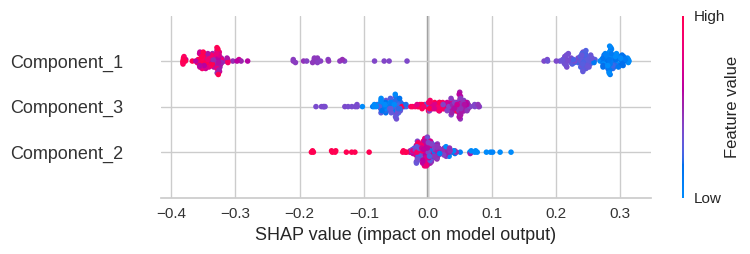

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [95]:
interpret_model(tuned_rf_pca, plot='summary')